Feature detection

Marius Dufraisse

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import corner_harris
from skimage.transform import rotate, rescale, SimilarityTransform
from skimage.color import rgb2lab
from skimage.measure import block_reduce
from scipy.spatial.distance import pdist
import queue

In [3]:
img = plt.imread("val.png")
img = rgb2lab(img)[:,:,0]

imgr = rotate(img, 90)

squares = np.zeros((256,256))
for (i,j) in np.ndindex(4,4):
    squares[64*i:64*i+32,64*j:64*j+32] = 1
    squares[64*i+32:64*i+64,64*j+32:64*j+64] = 1


In [22]:
a = corner_harris(img)
ar = corner_harris(imgr)

In [5]:
def threshold(img, threshold, fixed = False):
    if not fixed:
        threshold = threshold * img.max()
    return img >= threshold

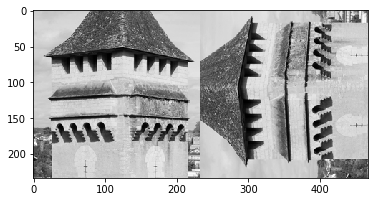

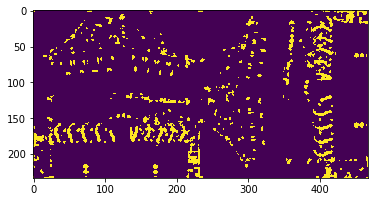

In [6]:
plt.imshow(np.hstack((img,imgr)),cmap='gray')
plt.show()

plt.imshow(np.hstack((threshold(a,0.01),threshold(ar,0.01))))
plt.show()


In [7]:
def nms(pts, r=1):
    c = 0.9
    maxmap = np.zeros_like(pts,dtype=int)
    impad = np.zeros((pts.shape[0]+2*r, pts.shape[1]+2*r))
    impad[:,:] = np.NINF
    impad[r:-r,r:-r] = pts
    for (i,j) in np.ndindex(a.shape):
        maxmap[i,j] = (c * (impad[i:i+2*r+1,j:j+2*r+1]).max() <= pts[i,j])
    return maxmap

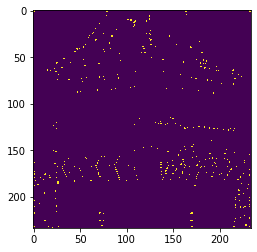

In [8]:
plt.imshow(nms(a)*threshold(a,0.01))
plt.show()

In [9]:
def nms1(pts, r=1):
    c = 0.9
    maxmap = np.zeros_like(pts,dtype=int)
    for (i,j) in np.ndindex(a.shape):
        maxmap[i,j] = (c * (pts[max(0,min(i-r,pts.shape[0]-1)):max(0,min(i+r+1,pts.shape[0])),max(0,min(j-r,pts.shape[0]-1)):max(0,min(j+r+1,pts.shape[0]))]).max() <= pts[i,j])
    return maxmap

In [10]:
%%time
for i in range(10):
    nms1(a,r=10)

CPU times: user 3.99 s, sys: 74.9 ms, total: 4.06 s
Wall time: 3.78 s


In [11]:
%%time
for i in range(10):
    nms(a,r=10)

CPU times: user 2.77 s, sys: 5.41 ms, total: 2.77 s
Wall time: 2.75 s


In [20]:
def anms(pts, correl, n):
    width = pts.shape[1]

    
    detected = [(correl[i,j],i,j) for i,j in np.ndindex(pts.shape) if pts[i,j]]
    detected.sort()
    
    detected_pos = np.array([[i,j] for _,i,j in detected])
    distances = pdist(detected_pos, metric='sqeuclidean')
    
    rmap = np.zeros_like(correl)
    processed = []
    
    # Process the first point
    _,i,j = detected.pop()
    processed.append((i,j))
    rmap[i,j] = - np.inf
    
    for c,i,j in detected:
        r = 0
        rmap[i,j] = -r
    
    # Extract the n best points
    pos = rmap.reshape[-1].argpartition(n)[:n]
    # Put the n best points in a 2D image
    res = np.zeros_like(pts)
    for p in pos:
        res[p // width, p % width] = True
    return res

In [ ]:
anms(a, a, 1)

In [17]:
a = np.array([1,4,3,2])

In [19]:
a.argpartition(2)

array([0, 3, 2, 1])

In [64]:
a.pop()

IndexError: pop from empty list

In [15]:
a

[1, 2, 3, 4]